In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc


In [3]:
# Import the dataset
opportunity = pd.read_excel('C:/JieZhang/NU/ALY6980/Data/OpportunityWW.xlsx')

# Check the first 5 rows of the dataset
opportunity.head(5)


,Stage,Opportunity Name,Account Name,Created Date,Close Date,Amount,Licenses Quoted,Opportunity Owner,Lead Source,Territory,Country* field,Type,Contact: Email,Opportunity Product
0,Stage 1: Qualification,ISD191-,ISD 191,2/16/2021,3/31/2021,NaN,NaN,Luke Barris,Volume Request,US,USA,Unknown,wbluhm@isd191.org,NaN
1,Stage 1: Qualification,Bunnell Hitchon Insurance-,Bunnell Hitchon Insurance,3/19/2021,3/31/2021,NaN,NaN,Luke Barris,PhantomPDF Business PDL 2016,Canada,Canada,Unknown,nthompson@bunnellhitchoninsurance.ca,NaN
2,Stage 1: Qualification,VETERANS' HILL ELEMENTARY-,Hutto ISD,2/17/2021,3/31/2021,NaN,NaN,Luke Barris,Volume Request,US,USA,Unknown,gloria.levario@huttoisd.net,NaN
3,Stage 1: Qualification,Alabama Destinations Career Academy-,Alabama Destinations Career Academy,1/27/2021,3/31/2021,NaN,NaN,Luke Barris,Volume Request,US,USA,Unknown,sburnett@k12.com,NaN
4,Stage 1: Qualification,"Msmil: Wall Street English-, 15 STD, New",Wall Street English,8/6/2021,9/30/2021,NaN,15.0,Max Jhuang,Contact: Foxit Admin Console,Asian Pacific,Myanmar,New Business,tinthtetaung@wallstreetenglish.edu.mm,NaN


In [4]:
# Summarize the dataset
opportunity.shape


(1577, 14)

In [5]:
# Summarize the dataset
opportunity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Stage                1577 non-null   object 
 1   Opportunity Name     1577 non-null   object 
 2   Account Name         1576 non-null   object 
 3   Created Date         1577 non-null   object 
 4   Close Date           1577 non-null   object 
 5   Amount               1461 non-null   float64
 6   Licenses Quoted      1204 non-null   float64
 7   Opportunity Owner    1577 non-null   object 
 8   Lead Source          1561 non-null   object 
 9   Territory            1500 non-null   object 
 10  Country* field       1262 non-null   object 
 11  Type                 1577 non-null   object 
 12  Contact: Email       1017 non-null   object 
 13  Opportunity Product  288 non-null    object 
dtypes: float64(2), object(12)
memory usage: 172.6+ KB


In [6]:
# Check the null values
opportunity.isnull().sum()


Stage                     0
Opportunity Name          0
Account Name              1
Created Date              0
Close Date                0
Amount                  116
Licenses Quoted         373
Opportunity Owner         0
Lead Source              16
Territory                77
Country* field          315
Type                      0
Contact: Email          560
Opportunity Product    1289
dtype: int64

In [7]:
# Check the unique number of each variable
opportunity.nunique()


Stage                     6
Opportunity Name       1507
Account Name           1104
Created Date            524
Close Date              455
Amount                  958
Licenses Quoted         127
Opportunity Owner        57
Lead Source             109
Territory                14
Country* field           69
Type                      4
Contact: Email          944
Opportunity Product      12
dtype: int64

In [8]:
# Summarize the numeric data
opportunity.describe()


,Amount,Licenses Quoted
count,1461.000000,1204.000000
mean,3501.267769,238.027409
std,13095.330592,1469.479465
min,0.000000,0.000000
25%,267.000000,4.000000
50%,852.000000,10.000000
75%,2556.000000,71.250000
max,327156.000000,39800.000000


In [11]:
opportunity.groupby("Stage").size()

Stage
Closed Lost                  641
Closed Won                   756
Stage 1: Qualification       151
Stage 2: Evaluation            7
Stage 3: Proposal/POC         18
Stage 5: Verbal Agreement      4
dtype: int64

In [37]:
# Filter out only closed won and lost data as it accounts for almost 90% of the dataset
data = opportunity[(opportunity["Stage"] == "Closed Lost") | (opportunity["Stage"] == "Closed Won")]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 180 to 1576
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Stage                1397 non-null   object 
 1   Opportunity Name     1397 non-null   object 
 2   Account Name         1397 non-null   object 
 3   Created Date         1397 non-null   object 
 4   Close Date           1397 non-null   object 
 5   Amount               1312 non-null   float64
 6   Licenses Quoted      1113 non-null   float64
 7   Opportunity Owner    1397 non-null   object 
 8   Lead Source          1381 non-null   object 
 9   Territory            1329 non-null   object 
 10  Country* field       1096 non-null   object 
 11  Type                 1397 non-null   object 
 12  Contact: Email       875 non-null    object 
 13  Opportunity Product  191 non-null    object 
dtypes: float64(2), object(12)
memory usage: 163.7+ KB


In [25]:
# Check the null values
data.isnull().sum()

Stage                     0
Opportunity Name          0
Account Name              0
Created Date              0
Close Date                0
Amount                   85
Licenses Quoted         284
Opportunity Owner         0
Lead Source              16
Territory                68
Country* field          301
Type                      0
Contact: Email          522
Opportunity Product    1206
dtype: int64

In [26]:
# Check the unique number of each variable
data.nunique()

Stage                     2
Opportunity Name       1335
Account Name            968
Created Date            502
Close Date              445
Amount                  897
Licenses Quoted         124
Opportunity Owner        54
Lead Source             100
Territory                14
Country* field           64
Type                      4
Contact: Email          810
Opportunity Product      12
dtype: int64

# Data Cleaning

In [38]:
# Drop columns that contain more than 10% Null values, as well as unnecessary columns
data = data.drop(["Opportunity Name", "Account Name", "Licenses Quoted", "Country* field", "Type", "Contact: Email", "Opportunity Product"], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 180 to 1576
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stage              1397 non-null   object 
 1   Created Date       1397 non-null   object 
 2   Close Date         1397 non-null   object 
 3   Amount             1312 non-null   float64
 4   Opportunity Owner  1397 non-null   object 
 5   Lead Source        1381 non-null   object 
 6   Territory          1329 non-null   object 
dtypes: float64(1), object(6)
memory usage: 87.3+ KB


### Create New Column

In [39]:
# Convert Created Date and Close Date variables to datetime form
data['Created Date'] = pd.to_datetime(data['Created Date']).dt.strftime('%Y-%m-%d')
data['Close Date'] = pd.to_datetime(data['Close Date']).dt.strftime('%Y-%m-%d')
data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Close Date'] = pd.to_datetime(data['Close Date'])

# Create a new column contains meatured day difference bewteen AppointmentDay and ScheduledDay
data['Duration'] = (data['Close Date'] - data['Created Date']).dt.days

# Drop unnecessary columns
data = data.drop(["Created Date", "Close Date"], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 180 to 1576
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stage              1397 non-null   object 
 1   Amount             1312 non-null   float64
 2   Opportunity Owner  1397 non-null   object 
 3   Lead Source        1381 non-null   object 
 4   Territory          1329 non-null   object 
 5   Duration           1397 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 76.4+ KB


### Misssing Values

In [45]:
# Summarize the numeric variable
data["Amount"].describe()

count      1312.000000
mean       3658.093438
std       13784.508684
min           0.000000
25%         245.825000
50%         783.500000
75%        2651.850000
max      327156.000000
Name: Amount, dtype: float64

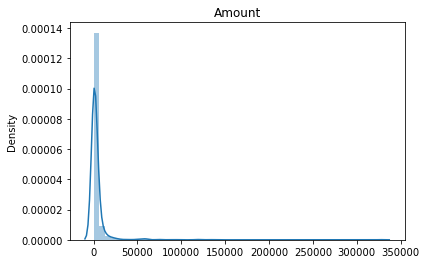

In [42]:
# Check the distributions for the numeric variable
plt.title("Amount")
sns.distplot(x = data["Amount"])
    
plt.xticks()
plt.show()


In [65]:
# Replace with median
data1 = data
data1["Amount"] = data1["Amount"].fillna(data1["Amount"].median())
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 180 to 1576
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stage              1397 non-null   object 
 1   Amount             1397 non-null   float64
 2   Opportunity Owner  1397 non-null   object 
 3   Lead Source        1381 non-null   object 
 4   Territory          1329 non-null   object 
 5   Duration           1397 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 76.4+ KB


In [66]:
# Remove the rest NANs which are less than 5%
data1 = data1.dropna(subset=["Lead Source", "Territory"]).reset_index(drop=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stage              1313 non-null   object 
 1   Amount             1313 non-null   float64
 2   Opportunity Owner  1313 non-null   object 
 3   Lead Source        1313 non-null   object 
 4   Territory          1313 non-null   object 
 5   Duration           1313 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 61.7+ KB


# Logistic Regression

In [82]:
# Label encoding for categorical variables
data1["Stage"] = LabelEncoder().fit_transform(data1["Stage"])
data1["Opportunity Owner"] = LabelEncoder().fit_transform(data1["Opportunity Owner"])
data1["Lead Source"] = LabelEncoder().fit_transform(data1["Lead Source"])
data1["Territory"] = LabelEncoder().fit_transform(data1["Territory"])

data1.head()

,Stage,Amount,Opportunity Owner,Lead Source,Territory,Duration
0,1,783.5,49,73,5,5
1,1,783.5,25,47,5,302
2,1,0.0,22,18,13,33
3,1,0.0,49,90,5,55
4,1,0.0,11,39,5,23


In [84]:
X = data1.drop(["Stage"], axis = 1)
y = data1["Stage"]

In [85]:
# Nomalization of numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [89]:
# Split the dataset into training and test set
random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [91]:
# Fit a logistic regression model to the training set
log = LogisticRegression(random_state=42)
lr_model = log.fit(X_train,y_train)

# Predict the test set results
y_pred_lr = lr_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.90      0.72      0.80       124
           1       0.79      0.93      0.85       139

    accuracy                           0.83       263
   macro avg       0.84      0.82      0.82       263
weighted avg       0.84      0.83      0.83       263



In [94]:
# Print out the model results
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print("The accuracy of the logistic regression model is " + str(round(lr_accuracy*100, 2)) + "% at a precision rate of " + 
      str(round(lr_precision*100, 2)) + "% with a recall score of " + str(round(lr_recall*100, 2)) + 
      "%, and the F1 score is " + str(round(lr_f1, 2)) + ".")

The accuracy of the logistic regression model is 82.89% at a precision rate of 78.66% with a recall score of 92.81%, and the F1 score is 0.85.


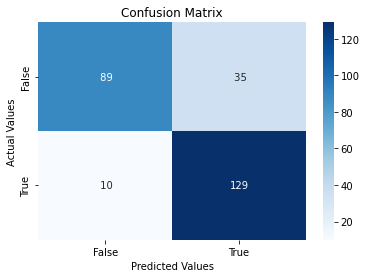

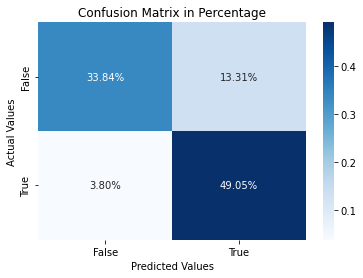

In [95]:
# Creat a confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
ax_lr = sns.heatmap(cm_lr, annot = True, cmap = "Blues", fmt = "3g")

ax_lr.set_title("Confusion Matrix")
ax_lr.set_xlabel("Predicted Values")
ax_lr.set_ylabel("Actual Values")
ax_lr.set_xticklabels(["False", "True"])
ax_lr.set_yticklabels(["False", "True"])

plt.show()

# Plot the confusion matrix in percentage
ax_lr_p = sns.heatmap(cm_lr/np.sum(cm_lr), annot = True, fmt = "0.2%", cmap = "Blues")

ax_lr_p.set_title("Confusion Matrix in Percentage");
ax_lr_p.set_xlabel("Predicted Values")
ax_lr_p.set_ylabel("Actual Values");
ax_lr_p.set_xticklabels(["False", "True"])
ax_lr_p.set_yticklabels(["False", "True"])

plt.show()

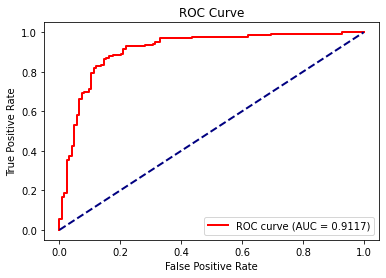

In [97]:
# Plot the ROC curve
pred_prob = lr_model.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_test, pred_prob[:,1])
roc_auc =auc(fpr,tpr)
plt.plot(fpr,tpr,color='red',lw=2,label='ROC curve (AUC = %0.4f)'%roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

### Feature Importance

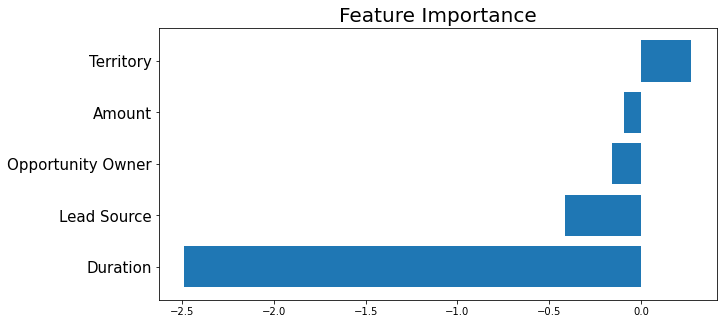

In [101]:
# Determine the most contributing features
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize = (10,5))
    plt.barh(range(len(names)), imp, align='center')
    plt.title("Feature Importance",fontsize=20)
    plt.yticks(range(len(names)),names,fontsize=15)
    plt.show()

f_importances(lr_model.coef_[0],data1.drop(["Stage"],axis=1).columns.values)

# Linear Regression

In [102]:
# Fit a linear regression model to the training set
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X2)
ols_model = ols.fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Stage   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          2.53e-103
Time:                        21:54:03   Log-Likelihood:                -514.86
No. Observations:                1050   AIC:                             1042.
Df Residuals:                    1044   BIC:                             1071.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5300      0.012     43.329      0.0

### Feature Importance

In [117]:
# Print the coefficients of the linear regression model
print(ols_model.params)

const    0.529967
x1      -0.020151
x2      -0.019572
x3      -0.075924
x4       0.030354
x5      -0.291030
dtype: float64


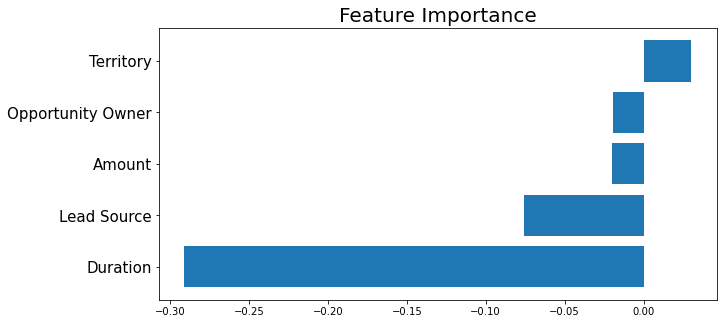

In [123]:
# Determine the most contributing features
f_importances(ols_model.params[1:],data1.drop(["Stage"],axis=1).columns.values)